# Batch Lever Press Analysis

### Notebook for processing and analyzing lever press behavior
Allows for processing, summarizing, and analysis of lever behavior across all sessions, and across multiple mice. Includes sections for data visualization 

In [1]:
# Import modules
import os
import numpy as np
from Lab_Analyses.Behavior.mouse_lever_behavior import analyze_mouse_lever_behavior
from Lab_Analyses.Behavior.group_lever_press import Group_Lever_Press
from Lab_Analyses.Behavior import behavior_plotting as bplot
from Lab_Analyses.Utilities.save_load_pickle import save_pickle, load_pickle

## Across Day Batch Processing and Summarizing
Sections below are for analyzing all sessions across all days of a standard lever press training regime. 


### Specify the data to be analyzed
#### Paths
Specify the paths where data files are located

In [2]:
# Parent path leading to where raw dispatcher and xsglog files are loacted
raw_path = r'Z:\People\Jake\Behavior'
#raw_path = r"C:\Users\Jake\Desktop\temp_behavior"
# Parent path leading to where analyzed data are saved
save_path = r'C:\Users\Jake\Desktop\Analyzed_data\individual'

#### Datasets
Specify what data to be processed and analyzed as well as other parameters associated with the data

In [9]:
# Mouse ids you wish to analyze
## Can have as many different ids as needed
id_1 = "JW156"
id_2 = "JW157"
id_3 = "JW158"
id_4 = "JW159"
id_5 = "JW175"
id_6 = "JW176"
id_7 = "BM068"
id_8 = "BM069"
id_9 = "JW216"


## Reanalyze ?
# Indicate if you are reanalyzing the data
# Will re-process, summarize, and analyze data even if already analyzed before
reanalyze = [True, True, True, True, True, True, True, True, True]
reanalyze = [not x for x in reanalyze]

## Ignore days ?
# Indicate if there are any days for each mouse you wish to ignore for analysis
# For example you did another session unrelated to this task (e.g. opto)
ignore_1 = ()
ignore_2 = ()
ignore_3 = ()
ignore_4 = ()
ignore_5 = ()
ignore_6 = ()
ignore_7 = ()
ignore_8 = ()
ignore_9 = ()

# Imaged Sessions
## Indicate which sessions were imaged

#### Number of sessiosn
num_of_sessions = 14
#### Put which sessions were imaged in the lists (must be int)
im_1 = [1,7,14]
im_2 = [1,7,14]
im_3 = [1,7,14]
im_4 = [1,7,14]
im_5 = [1,7,14]
im_6 = [1,7,14]
im_7 = []
im_8 = []
im_9 = []

#### Do not change this part
image_1 = [False if x not in np.array(im_1)-1 else True for x in range(num_of_sessions)]
image_2 = [False if x not in np.array(im_2)-1 else True for x in range(num_of_sessions)]
image_3 = [False if x not in np.array(im_3)-1 else True for x in range(num_of_sessions)]
image_4 = [False if x not in np.array(im_4)-1 else True for x in range(num_of_sessions)]
image_5 = [False if x not in np.array(im_5)-1 else True for x in range(num_of_sessions)]
image_6 = [False if x not in np.array(im_6)-1 else True for x in range(num_of_sessions)]
image_7 = [False if x not in np.array(im_7)-1 else True for x in range(num_of_sessions)]
image_8 = [False if x not in np.array(im_8)-1 else True for x in range(num_of_sessions)]
image_9 = [False if x not in np.array(im_9)-1 else True for x in range(num_of_sessions)]


# Give info about the experiment for each mouse
## Optional. Set to none below if not being used
exp_1 = "paAIP2 Population Imaging"
exp_2 = "paAIP2 Population Imaging"
exp_3 = "paAIP2 Population Imaging"
exp_4 = "paAIP2 Population Imaging"
exp_5 = "paAIP2 Population Imaging"
exp_6 = "paAIP2 Population Imaging"
exp_7 = "paAIP2 Behavior"
exp_8 = "paAIP2 Behavior"
exp_9 = "paAIP2 Behavior"


# Put information for each mouse in a list
### Can be just one mouse in the list

mouse_ids = [id_1,id_2, id_3, id_4, id_5, id_6]
imaged = [image_1, image_2, image_3, image_4, image_5, image_6, image_7, image_8]
exps = [exp_1, exp_2, exp_3, exp_4, exp_5, exp_6, exp_7, exp_8]
ignore_dirs = [ignore_1, ignore_2, ignore_3, ignore_4, ignore_5, ignore_6, ignore_7, ignore_8]

mouse_ids = [id_9]
imaged = [image_9]
exps = [exp_9]
ignore_dirs = [ignore_9]

### Process and Summarize each dataset

In [10]:
summed_data = []
for mouse_id, img, exp, reanaly, ignore in zip(mouse_ids, imaged, exps, reanalyze, ignore_dirs):
    print(mouse_id)
    path = os.path.join(raw_path, mouse_id)
    sd = analyze_mouse_lever_behavior(
        mouse_id=mouse_id, path=path, imaged=img, save=True, save_suffix=None, reanalyze=reanaly, 
        ignore_dir=ignore, press_len=0.5
    )
    summed_data.append(sd)

JW216
----------------------------
Analyzing Mouse JW216
 - Processing session 14
 - Summarizing session 14
Done Analyzing Mouse JW216
----------------------------


### Or load specific files
Give path and name for specific files you wish to load.  
Change the cell below to run the code

path = r'C:\Users\Jake\Desktop\Analyzed_data\individual'  
fname = "JW041_all_lever_data"  
loaded_data = load_pickle([fname], path)  

## Grouped analysis
Section to group data across mice within the same experimental group

In [11]:
# Parent path for where grouped data is stored
group_path = r'C:\Users\Jake\Desktop\Analyzed_data\grouped'
# Specify specific paths for this group
experiment_directory = "paAIP2_Population"
group_directory = "paAIP2"
# Specify the name of the group file
group_name = f"{group_directory}_{experiment_directory}_lever_press_data"

# Specify if you would like to load or regenerate the grouped data
load_data = False
# Specify if you would like to save the grouped data
save_grouped = True

# Group Data
if load_data is True:
    load_path = os.path.join(group_path, experiment_directory, group_directory)
    try:
        grouped_data = load_pickle([group_name],load_path)
        grouped_data = grouped_data[0]
        print("Grouped file loaded")
    except FileNotFoundError:
        print("Grouped file not found. Regenerating...")    
        grouped_data = Group_Lever_Press(summed_data)
else:
    grouped_data = Group_Lever_Press(summed_data)

if save_grouped is True:
    save_path = os.path.join(group_path, experiment_directory, group_directory)
    if not os.path.isdir(save_path):
        os.makedirs(save_path)
    save_pickle(group_name, grouped_data, save_path)
        


c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\group_lever_press.py:68: RuntimeWarning: Mean of empty slice
  mean_corr = np.nanmean(cat_matrices, axis=2)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\numpy\lib\nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\group_lever_press.py:83: RuntimeWarning: Mean of empty slice
  corr_mean = np.nanmean(corr)
c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\group_lever_press.py:101: RuntimeWarning: Mean of empty slice
  corr_mean = np.nanmean(corr)
c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\group_lever_press.py:119: RuntimeWarning: Mean of empty slice
  ctr_mean = np.nanmean(ctr)
c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Behavior\group_lever_press.py:137: RuntimeWarning: Mean of empty 

# Visualize Data
Uses built in plotting methods of the Group_Lever_Press class.  
If you wish to visualize only a single animal's data across sessions it can still be put into a Group_Lever_Press class for plotting

grouped_data = Group_Lever_Press() # Put individual mouse data inside to visualize a single mouse

### Visualize data across sessions

c:\users\jake\desktop\python_code\lab_analyses\Lab_Analyses\Plotting\plot_multi_line_plot.py:96: RuntimeWarning: Mean of empty slice
  mean = np.nanmean(value, axis=1)
C:\Users\Jake\Documents\Anaconda3\envs\analysis_env\lib\site-packages\matplotlib\axes\_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


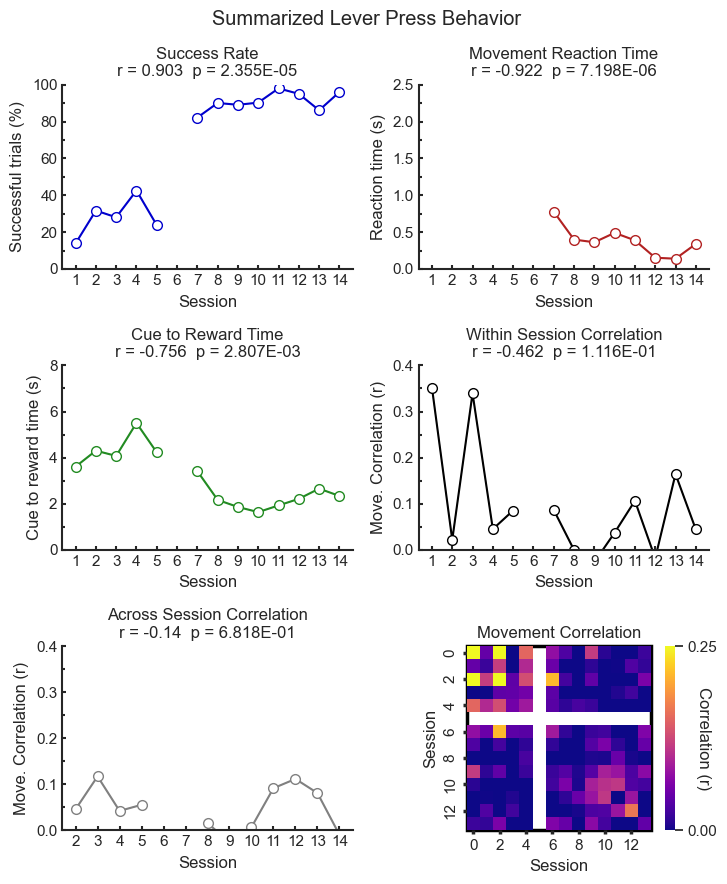

In [12]:
figure_path = r'C:\Users\Jake\Desktop\Figures'

# Specify if you want to save grouped figures
group_fig_save = False
group_fig_path = os.path.join(figure_path, "grouped_data", experiment_directory, group_directory)
if not os.path.isdir(group_fig_path):
    os.makedirs(group_fig_path)

# Plot the grouped data
colors = {"success": "mediumblue", "reaction_time": "firebrick", "cue_to_reward": "forestgreen", 
          "within": "black", "across":"grey", "cmap": "plasma"}
ylims = {"success": (0,100), "reaction_time": (0,2.5), "cue_to_reward": (0,8), 
         "within": (0,0.4), "across": (0,0.4), "cmap": (0, 0.25)}
grouped_data.plot_data(figsize=(7.5,9), colors=colors, plot_ind=True, ylims=ylims, save=group_fig_save, save_path=group_fig_path)

### Visualize single session lever presses

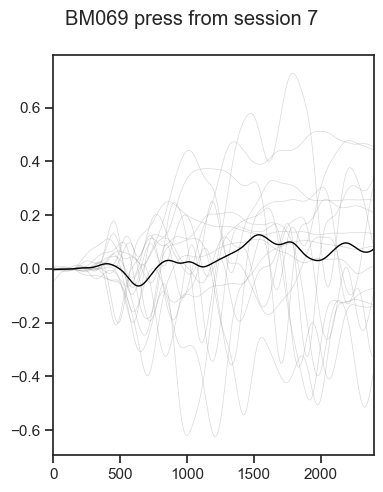

In [18]:
# specify which mouse and which session to plot
mouse = summed_data[1]
session = 7

# Specify if you want to save the figure
save_press = False
individual_lever_path = os.path.join(figure_path, "individual_mice", mouse.mouse_id)
if not os.path.isdir(individual_lever_path):
    os.mkdir(individual_lever_path)
    
# Plot the lever press traces
bplot.plot_session_rewarded_lever_presses(mouse, session, x_lim=(0,2400), figsize=(4,5), 
                                          save=save_press, save_path=individual_lever_path)

In [ ]:
d = summed_data[0]

In [ ]:
d.__dict__.keys()

In [ ]:
d.corr_movements[3].shape

In [ ]:
a = []
b = []
c =[]
l = [a, b, c]
d = [y for x in l for y in x]

In [ ]:
d

In [ ]:
import numpy as np
data = np.random.normal(5, 2, 1000)
data2 = np.random.normal(5.5, 2, 1000)

In [ ]:
import matplotlib.pyplot as plt
#sort data
x = np.sort(data)
x2 = np.sort(data2)

#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)
y2 = 1. * np.arange(len(data2)) / (len(data2) - 1)

#plot CDF

plt.plot(x, y)
plt.plot(x2, y2)
plt.xlabel('x')

In [ ]:
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils

In [ ]:
dataset = s_utils.load_analyzed_datasets(
    type="Local",
    grouped=True,
    session="Early",
    norm=True,
    activity_type="dFoF",
    extended=None,
    mouse=None,
    fov=None,
    fov_type="apical",
    period=None,
    partner=None,
)

In [ ]:
data = s_utils.load_spine_datasets("JW153", ["Early"], "apical")
data = data["FOV2_apical"]["Early"]

In [ ]:
import numpy as np
positions = np.array([1,1.1,1.2,2.1,2.2,2.3,3.1,3.3,3.4])
data = np.array([0,1,0,1,1,1,0,1,1])

binned_data = s_utils.bin_by_position(a, b, bins=np.array([1,2,3,4]), const=None)
binned_data

In [ ]:
MAX_DIST = 40
bin_num = int(MAX_DIST / 5)
position_bins = np.linspace(0, MAX_DIST, bin_num + 1)
np.nonzero((positions > 1) & (positions <= 2))[0]

In [ ]:
bins = np.array([1,2,3,4])
binned_data = []
const=6
for i in range(len(bins)):
    if i != len(bins) - 1:
        idxs = np.nonzero((positions > bins[i]) & (positions <= bins[i + 1]))[0]
        if idxs.size == 0:
            binned_data.append(np.nan)
            continue
        if const is None:
            binned_data.append(np.nanmean(data[idxs]))
        else:
            binned_data.append(np.nansum(data[idxs]) / const)

In [ ]:
binned_data

In [ ]:
avg_local_coactivity_rate = dataset.avg_local_coactivity_rate
shuff_local_coactivity_rate = dataset.shuff_local_coactivity_rate
spine_volumes = dataset.spine_volumes
followup_volumes = dataset.followup_volumes
spine_flags = dataset.spine_flags
followup_flags = dataset.followup_flags

In [ ]:
from Lab_Analyses.Spine_Analysis_v2 import structural_plasticity as s_plast

In [ ]:
volumes = [spine_volumes, followup_volumes]
flags = [spine_flags, followup_flags]
delta_volume, spine_idxs = s_plast.calculate_volume_change(
    volumes, flags, norm=False, exclude="Shaft Spine"
)
delta_volume = delta_volume[-1]
enlarged_spines, shrunken_spines, stable_spines = s_plast.classify_plasticity(
    delta_volume, threshold=(0.3,0.5), norm=False
)

In [ ]:
from Lab_Analyses.Utilities import data_utilities as d_utils

In [ ]:
avg_local_coactivity_rate = d_utils.subselect_data_by_idxs(
    avg_local_coactivity_rate, spine_idxs
)
shuff_local_coactivity_rate = d_utils.subselect_data_by_idxs(
    shuff_local_coactivity_rate, spine_idxs
)

In [ ]:
plastic_groups = {
        "Enlarged": "enlarged_spines",
        "Shrunken": "shrunken_spines",
        "Stable": "stable_spines",
    }

In [ ]:
plastic_local_rates = {}
plastic_shuff_rates = {}
plastic_shuff_medians = {}
plastic_shuff_medians_alt = {}

In [ ]:
for key, value in plastic_groups.items():
    spines = eval(value)
    plastic_local_rates[key] = avg_local_coactivity_rate[spines]
    shuff_rates = shuff_local_coactivity_rate[:, spines]
    plastic_shuff_rates[key] = shuff_rates
    plastic_shuff_medians[key] = np.nanmedian(shuff_rates, axis=1)
    plastic_shuff_medians_alt[key] = np.nanmedian(shuff_rates, axis=0)

In [ ]:
from Lab_Analyses.Plotting.plot_swarm_bar_plot import plot_swarm_bar_plot

In [ ]:
#sort data
data = plastic_local_rates["Enlarged"]
#data = data[~np.isnan(data)]
shuff_data = plastic_shuff_rates["Enlarged"]
data2 = plastic_shuff_rates["Enlarged"].flatten().astype(np.float32)
#data2 = data2[~np.isnan(data2)]
#data2 = plastic_shuff_medians_alt["Enlarged"]
x = np.sort(data)
x2 = np.sort(data2)

#calculate CDF values
y = 1. * np.arange(len(data)) / (len(data) - 1)
y2 = 1. * np.arange(len(data2)) / (len(data2) - 1)

# Do each shuffle
for r in range(shuff_data.shape[0]):
    temp_x = np.sort(shuff_data[r,:])
    temp_y = 1. * np.arange(len(shuff_data[r,:])) / (len(shuff_data[r,:]) - 1)
    sns.ecdfplot(data = shuff_data[r,:][~np.isnan(shuff_data[r,:])], color="black", alpha=0.002)

#plot CDF
sns.ecdfplot(data = data, label = "X1", color="darkorange")
sns.ecdfplot(data = data2, label = "X2", color="black")
plt.xlabel('x')
sns.despine()

In [ ]:
from Lab_Analyses.Plotting.plot_cummulative_distribution import plot_cummulative_distribution
from Lab_Analyses.Plotting.plot_swarm_bar_plot import plot_swarm_bar_plot
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5,3))

plot_cummulative_distribution(data=[data,shuff_data],plot_ind=True,color=["royalblue", "black"], ind_color=[None, "black"], 
                              ax=ax, xlim=(0, 5), line_width=2, ind_line_width=0.4, alpha=0.03, xtitle="Coactivity rate (events/min)")

inset = ax.inset_axes([0.8, 0.25, 0.4, 0.6])
sns.despine(ax=inset)
plot_swarm_bar_plot(
    data_dict={"data":data, "shuff": shuff_data.flatten().astype(np.float32)},
    mean_type="median",
    err_type="CI",
    ytitle="Coactivity rate",
    b_colors=["darkorange", "grey"],
    b_edgecolors="black",
    b_linewidth=1.5,
    plot_ind=False,
    ax=inset,
    b_alpha=0.7,
    axis_width=1.5,
    b_width=0.6
)

In [ ]:
from Lab_Analyses.Plotting.plot_box_plot import plot_box_plot

In [ ]:
COLORS = ["mediumslateblue", "tomato", "silver"]
#COLORS = ["darkorange", "darkviolet", "silver"]
plot_box_plot(
        plastic_local_rates,
        figsize=(2, 2.5),
        title="Relative volumes",
        xtitle=None,
        ytitle="Nearby \u0394 Volume",
        ylim=(0, None),
        b_colors=COLORS,
        b_edgecolors="black",
        b_err_colors="black",
        m_color="black",
        m_width=1.5,
        b_width=0.5,
        b_linewidth=1.5,
        b_alpha=0.9,
        b_err_alpha=1,
        whisker_lim=None,
        whisk_width=1.5,
        outliers=False,
        showmeans=True,
        axis_width=1.5,
        minor_ticks="y",
        tick_len=3,
        ax=None,
        save=False,
        save_path=None,
    )

In [ ]:
from Lab_Analyses.Utilities.save_load_pickle import load_pickle

In [ ]:
early_fname = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW153\imaging\FOV2_apical\Early\JW153_230131_GreenCh_imaging_data.pickle"
late_fname = r"C:\Users\Jake\Desktop\Analyzed_data\individual\JW153\imaging\FOV2_apical\Late\JW153_230210_GreenCh_imaging_data.pickle"

In [ ]:
data = load_pickle([early_fname, late_fname])

In [ ]:
early = data[0]
late = data[1]

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("ticks")
%matplotlib inline

In [ ]:
early.__dict__.keys()

In [ ]:
late_ltp = late.spine_pixel_intensity[16]
bg = np.nanmean(late.fluorescence["Background"])
late_ltp = late_ltp - bg

In [ ]:
import numpy as np
from matplotlib import cm
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = list(range(late_ltp.shape[1]))
y = list(range(late_ltp.shape[0]))
x, y = np.meshgrid(x,y)
ax.plot_surface(x, y, late_ltp, cmap=cm.plasma)

In [ ]:
early_ltp = early.spine_pixel_intensity[16]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = list(range(early_ltp.shape[1]))
y = list(range(early_ltp.shape[0]))
x, y = np.meshgrid(x,y)
ax.plot_surface(x, y, early_ltp, cmap=cm.plasma)

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage import io as sio
from tifffile import imsave
%matplotlib qt

In [ ]:
image_path = r"C:\Users\Jake\Desktop\smoothed_JW153_FOV2_Day_2_cropped_LTP.tif"
image = sio.imread(image_path, plugin="tifffile")

In [ ]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
x = list(range(image.shape[1]))
y = list(range(image.shape[0]))
x, y = np.meshgrid(x,y)
ax.plot_surface(x, y, image, cmap=cm.gnuplot2,linewidth=0.2, edgecolor="black", vmax=80)
ax.set_zlim(0,250)
ax.set_axis_off()
plt.savefig(
    'early_ltp.pdf'.format(ax.azim, ax.dist, ax.elev),
    format='pdf',
    bbox_inches='tight'
)

In [ ]:
image_path2 = r"C:\Users\Jake\Desktop\smoothed_JW153_FOV2_Day_12_cropped_LTP.tif"
image2 = sio.imread(image_path2, plugin="tifffile")

In [ ]:
fig2, ax2 = plt.subplots(subplot_kw={"projection": "3d"})
x = list(range(image2.shape[1]))
y = list(range(image2.shape[0]))
x, y = np.meshgrid(x,y)
ax2.plot_surface(x, y, image2, cmap=cm.gnuplot2,linewidth=0.2, edgecolor="black", vmax=180)
ax2.set_zlim(0,450)
ax2.set_axis_off()
fig2.savefig(
    'late_ltp.pdf'.format(ax2.azim, ax2.dist, ax2.elev),
    format='pdf',
    bbox_inches='tight'
)